In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

In [4]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [5]:
%matplotlib inline

In [6]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [7]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [8]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/31/2020 10:45:32 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:45:42 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:45:52 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:46:02 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:46:12 Load

05/31/2020 10:51:03 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub26_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:51:12 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub26_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:51:22 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub28_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:51:32 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub28_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:51:41 Load

In [9]:
dtfa.load_state('data/affvids_norest_k100_n1000_05222020_003853') 

In [10]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in affvids_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz', num_factors=100)

05/31/2020 10:56:15 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:56:25 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:56:35 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:56:44 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 10:56:53 Load

05/31/2020 11:01:38 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub26_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:01:48 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub26_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:01:58 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub28_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:02:07 Loading Nifti image /home/zulqarnain/fmri_data/AffVids_mcwm/motion_corrected/sub28_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:02:17 Load

In [11]:
htfa.load_state('data/affvids_norest_k100_n1000_05312020_023141')

In [12]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [13]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

def high_low_labeler(task):
    if 'high' in task:
        return 'high'
    elif 'low' in task:
        return 'low'
    else:
        return None

In [14]:
def block_task_labeler(block):
    return task_labeler(block.task)

def block_high_low_labeler(block):
    if 'high' in block.task:
        return 'high'
    elif 'low' in block.task:
        return 'low'
    else:
        return None

In [15]:
def subject_labeler(subject):
    return 'Subject %d' % subject

In [16]:
def block_subject_labeler(block):
    return subject_labeler(block.subject)

In [17]:
def classification_pipeline(data,targets,session_labels,scoring="roc_auc",input_data=False,print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    feature_selection = SelectPercentile(f_classif, percentile=5)
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        svc = SVC(C=1., kernel="linear")
        if input_data:
            classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
        else:
            classifier = svc
        dummy_classifier = DummyClassifier()

        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
            scoring="roc_auc",
        )
        
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [18]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [19]:
### task classification using leave one out runs on NTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels = session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/CI Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.9792 +- 0.0295
Chance Scores: 0.4375 +- 0.2652
Processing Social threat
Scores: 0.9583 +- 0.0589
Chance Scores: 0.6458 +- 0.1284
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5625 +- 0.1840
...
Overall Score: 0.9792 +- 0.0417
Overall Dummy Score: 0.5486 +- 0.2181


Processing Subject 11
Processing Heights
Scores: 0.8095 +- 0.1323
Chance Scores: 0.6250 +- 0.0510
Processing Social threat
Scores: 0.9211 +- 0.0470
Chance Scores: 0.6012 +- 0.0611
Processing Spiders
Scores: 0.7743 +- 0.1015
Chance Scores: 0.5278 +- 0.1737
...
Overall Score: 0.8350 +- 0.1180
Overall Dummy Score: 0.5847 +- 0.1179


Processing Subject 12
Processing Heights
Scores: 0.4410 +- 0.0661
Chance Scores: 0.6389 +- 0.0354
Processing Social threat
Scores: 0.5833 +- 0.0642
Chance Scores: 0.4286 +- 0.0526
Processing Spiders
Scores: 0.6786 +- 0.1271
Chance Scores: 0.4702 +- 0.0661
...
Overall Score: 0.5676 +- 0.1332
Overall Dummy Score: 0.5126 +- 0.1052


Proc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9449 +- 0.0400
Chance Scores: 0.4673 +- 0.1946
Processing Spiders
Scores: 0.8571 +- 0.1051
Chance Scores: 0.3899 +- 0.1801
...
Overall Score: 0.9028 +- 0.0864
Overall Dummy Score: 0.4501 +- 0.1877


Processing Subject 23
Processing Heights
Scores: 0.8839 +- 0.0089
Chance Scores: 0.4196 +- 0.2054
Processing Social threat
Scores: 0.7656 +- 0.0156
Chance Scores: 0.3304 +- 0.0446
Processing Spiders
Scores: 0.8333 +- 0.0833
Chance Scores: 0.4583 +- 0.0208
...
Overall Score: 0.8276 +- 0.0691
Overall Dummy Score: 0.4028 +- 0.1332


Processing Subject 25
Processing Heights
Scores: 0.8289 +- 0.0593
Chance Scores: 0.4970 +- 0.1495
Processing Social threat
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.1284
Processing Spiders
Scores: 0.9583 +- 0.0390
Chance Scores: 0.5595 +- 0.0842
...
Overall Score: 0.9291 +- 0.0836
Overall Dummy Score: 0.5050 +- 0.1306


Processing Subject 26
Processing Heights
Scores: 0.6920 +- 0.1295
Chance Scores: 0.6161 +- 0.0089
Processing Social threat
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4196 +- 0.0740
Chance Scores: 0.4911 +- 0.1423
Processing Spiders
Scores: 0.4097 +- 0.1319
Chance Scores: 0.5764 +- 0.1039
...
Overall Score: 0.4089 +- 0.1191
Overall Dummy Score: 0.5413 +- 0.1186


...
NTFA Summary Score Across Subjects, For Category Heights : 0.7858 +- 0.2109
NTFA Summary Score Across Subjects, For Category Social threat : 0.8071 +- 0.2143
NTFA Summary Score Across Subjects, For Category Spiders : 0.8305 +- 0.1952
...
NTFA Summary Score Across Subjects, Across Tasks: 0.8078 +- 0.2078
Overall Dummy Score: 0.5011 +- 0.1503
...
NTFA Summary Mean/CI, Across Tasks: 0.8024 +- 0.0880
Overall Dummy Mean/CI Score: 0.5011 +- 0.0237


In [20]:
### task classification using leave one out runs on HTFA###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                 session_labels = session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject 10
Processing Heights
Scores: 0.8542 +- 0.0780
Chance Scores: 0.4583 +- 0.1932
Processing Social threat
Scores: 0.8438 +- 0.0442
Chance Scores: 0.6042 +- 0.0589
Processing Spiders
Scores: 0.9688 +- 0.0442
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.8889 +- 0.0808
Overall Dummy Score: 0.5208 +- 0.1443


Processing Subject 11
Processing Heights
Scores: 0.6771 +- 0.0642
Chance Scores: 0.6012 +- 0.0748
Processing Social threat
Scores: 0.8690 +- 0.0517
Chance Scores: 0.3929 +- 0.2020
Processing Spiders
Scores: 0.8646 +- 0.1031
Chance Scores: 0.3542 +- 0.0780
...
Overall Score: 0.8036 +- 0.1175
Overall Dummy Score: 0.4494 +- 0.1711


Processing Subject 12
Processing Heights
Scores: 0.4271 +- 0.0820
Chance Scores: 0.4375 +- 0.1021
Processing Social threat
Scores: 0.4866 +- 0.1500
Chance Scores: 0.3869 +- 0.0879
Processing Spiders
Scores: 0.5625 +- 0.1421
Chance Scores: 0.4732 +- 0.1218
...
Overall Score: 0.4921 +- 0.1398
Overall Dummy Score: 0.4325 +- 0.1106


Proc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.5357 +- 0.0357
Chance Scores: 0.5491 +- 0.1384
Processing Social threat
Scores: 0.4688 +- 0.0312
Chance Scores: 0.5848 +- 0.0223
Processing Spiders
Scores: 0.6406 +- 0.1406
Chance Scores: 0.6042 +- 0.1667
...
Overall Score: 0.5484 +- 0.1111
Overall Dummy Score: 0.5794 +- 0.1278


Processing Subject 25
Processing Heights
Scores: 0.7976 +- 0.0720
Chance Scores: 0.4315 +- 0.1380
Processing Social threat
Scores: 0.8368 +- 0.0713
Chance Scores: 0.3958 +- 0.0295
Processing Spiders
Scores: 0.8244 +- 0.0374
Chance Scores: 0.4762 +- 0.0611
...
Overall Score: 0.8196 +- 0.0645
Overall Dummy Score: 0.4345 +- 0.0947


Processing Subject 26
Processing Heights
Scores: 0.6562 +- 0.0938
Chance Scores: 0.4911 +- 0.2411
Processing Social threat
Scores: 0.6510 +- 0.0677
Chance Scores: 0.5833 +- 0.0417
Processing Spiders
Scores: 0.7701 +- 0.0513
Chance Scores: 0.5848 +- 0.1027
...
Overall Score: 0.6925 +- 0.0914
Overall Dummy Score: 0.5531 +- 0.1593


Processing Subject 28
Processing Heights
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [21]:
### task classification using leave one out runs on input data###
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                    session_labels = session_labels,
                                                                    input_data=True,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject 10
Processing Heights
Scores: 0.9688 +- 0.0442
Chance Scores: 0.4583 +- 0.0295
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9896 +- 0.0147
Chance Scores: 0.5000 +- 0.1350
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.0780
...
Overall Score: 0.9861 +- 0.0299
Overall Dummy Score: 0.5139 +- 0.1053


Processing Subject 11
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8839 +- 0.1397
Chance Scores: 0.4940 +- 0.1407
Processing Social threat
Scores: 0.9479 +- 0.0390
Chance Scores: 0.5149 +- 0.1297
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9271 +- 0.0642
Chance Scores: 0.4375 +- 0.0510
...
Overall Score: 0.9196 +- 0.0954
Overall Dummy Score: 0.4821 +- 0.1189


Processing Subject 12
Processing Heights
Scores: 0.2951 +- 0.1110
Chance Scores: 0.6944 +- 0.1288
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.6756 +- 0.0274
Chance Scores: 0.5804 +- 0.1667
Processing Spiders
Scores: 0.6399 +- 0.1997
Chance Scores: 0.4345 +- 0.1323
...
Overall Score: 0.5369 +- 0.2170
Overall Dummy Score: 0.5698 +- 0.1787


Processing Subject 13
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9211 +- 0.0593
Chance Scores: 0.5179 +- 0.0569
Processing Social threat
Scores: 0.9881 +- 0.0168
Chance Scores: 0.4940 +- 0.0517
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8889 +- 0.0856
Chance Scores: 0.3681 +- 0.0098
...
Overall Score: 0.9327 +- 0.0736
Overall Dummy Score: 0.4600 +- 0.0795


Processing Subject 14
Processing Heights
Scores: 0.8594 +- 0.0156
Chance Scores: 0.5938 +- 0.0938
Processing Social threat
Scores: 0.9062 +- 0.0312
Chance Scores: 0.5312 +- 0.1562
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6250 +- 0.0625
...
Overall Score: 0.9219 +- 0.0618
Overall Dummy Score: 0.5833 +- 0.1179


Processing Subject 15
Processing Heights
Scores: 0.8819 +- 0.0937
Chance Scores: 0.3681 +- 0.0839
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8958 +- 0.1062
Chance Scores: 0.4702 +- 0.1599
Processing Spiders
Scores: 0.9375 +- 0.0675
Chance Scores: 0.5595 +- 0.1789
...
Overall Score: 0.9051 +- 0.0936
Overall Dummy Score: 0.4659 +- 0.1663


Processing Subject 16
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3542 +- 0.1932
Processing Social threat
Scores: 0.9896 +- 0.0147
Chance Scores: 0.5327 +- 0.0256
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9896 +- 0.0147
Chance Scores: 0.4970 +- 0.0864
...
Overall Score: 0.9931 +- 0.0130
Overall Dummy Score: 0.4613 +- 0.1453


Processing Subject 17
Processing Heights
Scores: 0.9896 +- 0.0147
Chance Scores: 0.4931 +- 0.1447
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9226 +- 0.0552
Chance Scores: 0.4673 +- 0.1564
Processing Spiders
Scores: 0.8557 +- 0.0625
Chance Scores: 0.5952 +- 0.0421
...
Overall Score: 0.9226 +- 0.0734
Overall Dummy Score: 0.5185 +- 0.1370


Processing Subject 18
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8924 +- 0.0484
Chance Scores: 0.4583 +- 0.0780
Processing Social threat
Scores: 0.6979 +- 0.0737
Chance Scores: 0.4732 +- 0.0859
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7991 +- 0.1468
Chance Scores: 0.5595 +- 0.1378
...
Overall Score: 0.7965 +- 0.1268
Overall Dummy Score: 0.4970 +- 0.1132


Processing Subject 19
Processing Heights
Scores: 0.8819 +- 0.0597
Chance Scores: 0.4097 +- 0.0708
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5625 +- 0.0510
Processing Spiders
Scores: 0.8557 +- 0.0625
Chance Scores: 0.5149 +- 0.1557
...
Overall Score: 0.9125 +- 0.0802
Overall Dummy Score: 0.4957 +- 0.1212


Processing Subject 23
Processing Heights
Scores: 0.6540 +- 0.0603
Chance Scores: 0.5893 +- 0.0893
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.7344 +- 0.0156
Chance Scores: 0.7143 +- 0.1607
Processing Spiders
Scores: 0.8542 +- 0.0208
Chance Scores: 0.6042 +- 0.0417
...
Overall Score: 0.7475 +- 0.0906
Overall Dummy Score: 0.6359 +- 0.1223


Processing Subject 25
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8720 +- 0.0474
Chance Scores: 0.6399 +- 0.1433
Processing Social threat
Scores: 0.9514 +- 0.0354
Chance Scores: 0.5208 +- 0.2811
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9896 +- 0.0147
Chance Scores: 0.4048 +- 0.1121
...
Overall Score: 0.9377 +- 0.0603
Overall Dummy Score: 0.5218 +- 0.2158


Processing Subject 26
Processing Heights
Scores: 0.8103 +- 0.1540
Chance Scores: 0.3304 +- 0.0446
Processing Social threat
Scores: 0.6302 +- 0.0885
Chance Scores: 0.2812 +- 0.0938
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8393 +- 0.0893
Chance Scores: 0.4821 +- 0.0179
...
Overall Score: 0.7599 +- 0.1474
Overall Dummy Score: 0.3646 +- 0.1049


Processing Subject 28
Processing Heights
Scores: 0.8795 +- 0.0657
Chance Scores: 0.4464 +- 0.0126
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9658 +- 0.0292
Chance Scores: 0.4494 +- 0.2376
Processing Spiders
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4722 +- 0.1207
...
Overall Score: 0.9484 +- 0.0655
Overall Dummy Score: 0.4560 +- 0.1545


Processing Subject 29
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9003 +- 0.0707
Chance Scores: 0.3869 +- 0.0716
Processing Social threat
Scores: 0.9792 +- 0.0295
Chance Scores: 0.6190 +- 0.1024
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9757 +- 0.0177
Chance Scores: 0.5347 +- 0.1133
...
Overall Score: 0.9517 +- 0.0582
Overall Dummy Score: 0.5136 +- 0.1367


Processing Subject 4
Processing Heights
Scores: 0.9137 +- 0.0276
Chance Scores: 0.4554 +- 0.0789
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9554 +- 0.0318
Chance Scores: 0.4286 +- 0.1708
Processing Spiders
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.2125
...
Overall Score: 0.9425 +- 0.0465
Overall Dummy Score: 0.4335 +- 0.1646


Processing Subject 5
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9062 +- 0.0675
Chance Scores: 0.4524 +- 0.0845
Processing Social threat
Scores: 0.9688 +- 0.0255
Chance Scores: 0.5714 +- 0.1028
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9896 +- 0.0147
Chance Scores: 0.3958 +- 0.1062
...
Overall Score: 0.9549 +- 0.0553
Overall Dummy Score: 0.4732 +- 0.1226


Processing Subject 6
Processing Heights
Scores: 0.4435 +- 0.1500
Chance Scores: 0.5327 +- 0.1185
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2307 +- 0.0546
Chance Scores: 0.6190 +- 0.0084
Processing Spiders
Scores: 0.5139 +- 0.1195
Chance Scores: 0.4722 +- 0.0767
...
Overall Score: 0.3960 +- 0.1666
Overall Dummy Score: 0.5413 +- 0.1015


Processing Subject 7
Processing Heights
Scores: 0.4062 +- 0.0312
Chance Scores: 0.4062 +- 0.1562
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3438 +- 0.0938
Chance Scores: 0.5625 +- 0.0625
Processing Spiders
Scores: 0.4219 +- 0.0781
Chance Scores: 0.5625 +- 0.0625
...
Overall Score: 0.3906 +- 0.0802
Overall Dummy Score: 0.5104 +- 0.1272


Processing Subject 8
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0295
Chance Scores: 0.4940 +- 0.0517
Processing Social threat
Scores: 0.8681 +- 0.0839
Chance Scores: 0.5764 +- 0.0196
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.2357
...
Overall Score: 0.9421 +- 0.0753
Overall Dummy Score: 0.5513 +- 0.1455


Processing Subject 9
Processing Heights
Scores: 0.5045 +- 0.1959
Chance Scores: 0.6190 +- 0.0517
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.3616 +- 0.0609
Chance Scores: 0.4137 +- 0.1251
Processing Spiders
Scores: 0.5833 +- 0.1559
Chance Scores: 0.4722 +- 0.1133
...
Overall Score: 0.4831 +- 0.1748
Overall Dummy Score: 0.5017 +- 0.1336


...
Voxel Summary Score Across Subjects, For Category Heights : 0.8091 +- 0.2205
Voxel Summary Score Across Subjects, For Category Social threat : 0.8202 +- 0.2353
Voxel Summary Score Across Subjects, For Category Spiders : 0.8634 +- 0.1847
...
Voxel Summary Score Across Subjects, Across Tasks: 0.8309 +- 0.2158
Overall Dummy Score: 0.50 +- 0.15
...
Voxel Summary Mean/CI, Across Tasks: 0.8229 +- 0.0899


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


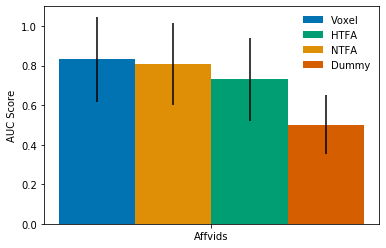

In [22]:
voxel_accuracies = np.mean(voxel_summary_result)
voxel_errs = np.std(voxel_summary_result)
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies.pdf')

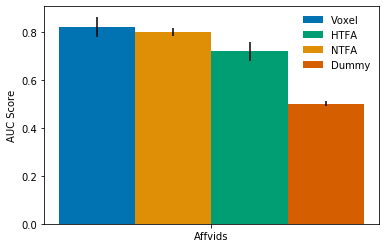

In [23]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means)# * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) #* stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result)# * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) #* stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_se.pdf')

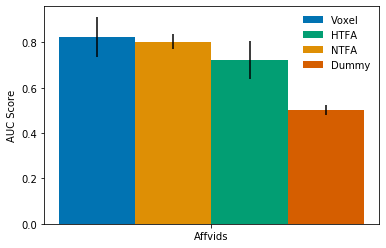

In [24]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [25]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=6.879327428363703, pvalue=2.7623311657814077e-08)

In [26]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [27]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())
spider_matrix = []
social_matrix = []
heights_matrix = []
all_matrix = []

spider_matrix_p = []
social_matrix_p = []
heights_matrix_p = []
all_matrix_p = []
for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'Spiders':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        spider_matrix.append(r)
        spider_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'Social threat':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        social_matrix.append(r)
        social_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'Heights':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        heights_matrix.append(r)
        heights_matrix_p.append(p)

        
        
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))
all_matrix = np.array(all_matrix)

spider_matrix_p = (np.array(spider_matrix_p))
social_matrix_p = (np.array(social_matrix_p))
heights_matrix_p = (np.array(heights_matrix_p))
all_matrix_p = np.array(all_matrix_p)

spider_matrix = spider_matrix * spider_matrix_p
social_matrix = social_matrix * social_matrix_p
heights_matrix = heights_matrix * heights_matrix_p
all_matrix = all_matrix * all_matrix_p

all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
spider_vectors_p = np.zeros(shape=(spider_matrix_p.shape[0],4950))

for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)
    spider_vectors_p[i,:] = distance.squareform(spider_matrix_p[i,:,:],checks=False)


social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
social_vectors_p = np.zeros(shape=(social_matrix_p.shape[0],4950))

for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    social_vectors_p[i,:] = distance.squareform(social_matrix_p[i,:,:],checks=False)

    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
heights_vectors_p = np.zeros(shape=(heights_matrix_p.shape[0],4950))

for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    heights_vectors_p[i,:] = distance.squareform(heights_matrix_p[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [28]:
all_vectors[0].shape

(4950,)

In [29]:
### task classification using leave one out runs on NTFA using functional connectivity###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                    session_labels = session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())
    summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/CI Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.8646 +- 0.0147
Chance Scores: 0.5833 +- 0.1062
Processing Social threat
Scores: 0.9792 +- 0.0295
Chance Scores: 0.4792 +- 0.0295
Processing Spiders
Scores: 0.9271 +- 0.0390
Chance Scores: 0.5000 +- 0.0884
...
Overall Score: 0.9236 +- 0.0553
Overall Dummy Score: 0.5208 +- 0.0932


Processing Subject 11
Processing Heights
Scores: 0.5699 +- 0.0858
Chance Scores: 0.3393 +- 0.0379
Processing Social threat
Scores: 0.7158 +- 0.0292
Chance Scores: 0.6399 +- 0.0800
Processing Spiders
Scores: 0.6528 +- 0.1277
Chance Scores: 0.5556 +- 0.0098
...
Overall Score: 0.6462 +- 0.1084
Overall Dummy Score: 0.5116 +- 0.1366


Processing Subject 12
Processing Heights
Scores: 0.3819 +- 0.1254
Chance Scores: 0.4444 +- 0.1934
Processing Social threat
Scores: 0.3408 +- 0.2016
Chance Scores: 0.3095 +- 0.0842
Processing Spiders
Scores: 0.6280 +- 0.1460
Chance Scores: 0.4702 +- 0.1401
...
Overall Score: 0.4502 +- 0.2049
Overall Dummy Score: 0.4081 +- 0.1623


Proc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9410 +- 0.0420
Chance Scores: 0.5625 +- 0.0884
...
Overall Score: 0.9059 +- 0.0629
Overall Dummy Score: 0.5149 +- 0.1620


Processing Subject 14
Processing Heights
Scores: 0.5781 +- 0.0469
Chance Scores: 0.5000 +- 0.1250
Processing Social threat
Scores: 0.7969 +- 0.0156
Chance Scores: 0.4688 +- 0.0312
Processing Spiders
Scores: 0.9531 +- 0.0469
Chance Scores: 0.5938 +- 0.0312
...
Overall Score: 0.7760 +- 0.1587
Overall Dummy Score: 0.5208 +- 0.0932


Processing Subject 15
Processing Heights
Scores: 0.9236 +- 0.0566
Chance Scores: 0.4167 +- 0.1179
Processing Social threat
Scores: 0.9688 +- 0.0442
Chance Scores: 0.4286 +- 0.1028
Processing Spiders
Scores: 0.6607 +- 0.0636
Chance Scores: 0.4494 +- 0.1807
...
Overall Score: 0.8510 +- 0.1467
Overall Dummy Score: 0.4315 +- 0.1386


Processing Subject 16
Processing Heights
Scores: 0.7569 +- 0.0743
Chance Scores: 0.5764 +- 0.0547
Processing Social threat
Scores: 0.7827 +- 0.0511
Chance Scores: 0.4940 +- 0.1533
Processing Spiders
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.4539 +- 0.0577
Chance Scores: 0.4881 +- 0.0537
Processing Spiders
Scores: 0.3661 +- 0.2350
Chance Scores: 0.3244 +- 0.1305
...
Overall Score: 0.4921 +- 0.1903
Overall Dummy Score: 0.4120 +- 0.1251


Processing Subject 19
Processing Heights
Scores: 0.8090 +- 0.1233
Chance Scores: 0.5347 +- 0.0708
Processing Social threat
Scores: 0.9479 +- 0.0737
Chance Scores: 0.5952 +- 0.0463
Processing Spiders
Scores: 0.6890 +- 0.1125
Chance Scores: 0.7054 +- 0.1667
...
Overall Score: 0.8153 +- 0.1493
Overall Dummy Score: 0.6118 +- 0.1290


Processing Subject 23
Processing Heights
Scores: 0.8638 +- 0.0424
Chance Scores: 0.4286 +- 0.0536
Processing Social threat
Scores: 0.8460 +- 0.0603
Chance Scores: 0.5893 +- 0.1607
Processing Spiders
Scores: 0.7448 +- 0.0365
Chance Scores: 0.4896 +- 0.0729
...
Overall Score: 0.8182 +- 0.0707
Overall Dummy Score: 0.5025 +- 0.1254


Processing Subject 25
Processing Heights
Scores: 0.8274 +- 0.0210
Chance Scores: 0.4464 +- 0.0526
Processing Social threat
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9583 +- 0.0295
Chance Scores: 0.3333 +- 0.0295
...
Overall Score: 0.8710 +- 0.1029
Overall Dummy Score: 0.4901 +- 0.1364


Processing Subject 29
Processing Heights
Scores: 0.7753 +- 0.1196
Chance Scores: 0.4851 +- 0.0701
Processing Social threat
Scores: 0.9062 +- 0.0765
Chance Scores: 0.5744 +- 0.0374
Processing Spiders
Scores: 0.7188 +- 0.0255
Chance Scores: 0.6250 +- 0.0884
...
Overall Score: 0.8001 +- 0.1145
Overall Dummy Score: 0.5615 +- 0.0897


Processing Subject 4
Processing Heights
Scores: 0.7812 +- 0.0255
Chance Scores: 0.6369 +- 0.1466
Processing Social threat
Scores: 0.8839 +- 0.0623
Chance Scores: 0.4940 +- 0.1024
Processing Spiders
Scores: 0.8333 +- 0.0390
Chance Scores: 0.4167 +- 0.0295
...
Overall Score: 0.8328 +- 0.0614
Overall Dummy Score: 0.5159 +- 0.1388


Processing Subject 5
Processing Heights
Scores: 0.6339 +- 0.0623
Chance Scores: 0.4881 +- 0.0537
Processing Social threat
Scores: 0.7262 +- 0.0611
Chance Scores: 0.4554 +- 0.1034
Processing Spiders
Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

In [30]:
### functional connectivity using HTFA ###

spider_matrix = []
social_matrix = []
heights_matrix = []
all_matrix = []

spider_matrix_p = []
social_matrix_p = []
heights_matrix_p = []
all_matrix_p = []
for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'Spiders':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        spider_matrix.append(r)
        spider_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'Social threat':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        social_matrix.append(r)
        social_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'Heights':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        heights_matrix.append(r)
        heights_matrix_p.append(p)

        
        
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))
all_matrix = np.array(all_matrix)

spider_matrix_p = (np.array(spider_matrix_p))
social_matrix_p = (np.array(social_matrix_p))
heights_matrix_p = (np.array(heights_matrix_p))
all_matrix_p = np.array(all_matrix_p)

spider_matrix = spider_matrix * spider_matrix_p
social_matrix = social_matrix * social_matrix_p
heights_matrix = heights_matrix * heights_matrix_p
all_matrix = all_matrix * all_matrix_p

all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
spider_vectors_p = np.zeros(shape=(spider_matrix_p.shape[0],4950))

for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)
    spider_vectors_p[i,:] = distance.squareform(spider_matrix_p[i,:,:],checks=False)


social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
social_vectors_p = np.zeros(shape=(social_matrix_p.shape[0],4950))

for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    social_vectors_p[i,:] = distance.squareform(social_matrix_p[i,:,:],checks=False)

    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
heights_vectors_p = np.zeros(shape=(heights_matrix_p.shape[0],4950))

for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    heights_vectors_p[i,:] = distance.squareform(heights_matrix_p[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [31]:
### task classification using leave one out runs on HTFA using functional connectivity###
cv = LeaveOneGroupOut()
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

subjects = OrderedSet([b.subject for b in htfa._blocks])

for s in subjects:
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(htfa.num_blocks):
        if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
    data = np.array(data)
    overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                   targets=targets,
                                                                session_labels = session_labels,
                                                                   scoring="roc_auc",
                                                                   print_all=True)
    summary_result_category.append(category_result)
    summary_result.extend(overall_result)
    summary_result_chance.extend(overall_result_chance)
    summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in np.unique(targets)}
for c in np.unique(targets):
    for s in summary_result_category:
        category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print ('...')
print("HTFA Summary Mean/CI, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject 10
Processing Heights
Scores: 0.8854 +- 0.1031
Chance Scores: 0.4792 +- 0.1062
Processing Social threat
Scores: 0.9167 +- 0.0966
Chance Scores: 0.6458 +- 0.1062
Processing Spiders
Scores: 0.9479 +- 0.0390
Chance Scores: 0.5625 +- 0.2224
...
Overall Score: 0.9167 +- 0.0884
Overall Dummy Score: 0.5625 +- 0.1693


Processing Subject 11
Processing Heights
Scores: 0.6339 +- 0.0764
Chance Scores: 0.4524 +- 0.1223
Processing Social threat
Scores: 0.7708 +- 0.2062
Chance Scores: 0.4167 +- 0.0780
Processing Spiders
Scores: 0.7361 +- 0.0322
Chance Scores: 0.3542 +- 0.1284
...
Overall Score: 0.7136 +- 0.1409
Overall Dummy Score: 0.4077 +- 0.1190


Processing Subject 12
Processing Heights
Scores: 0.4062 +- 0.1112
Chance Scores: 0.6181 +- 0.0937
Processing Social threat
Scores: 0.4211 +- 0.1234
Chance Scores: 0.4494 +- 0.1305
Processing Spiders
Scores: 0.6711 +- 0.1321
Chance Scores: 0.6607 +- 0.0718
...
Overall Score: 0.4995 +- 0.1726
Overall Dummy Score: 0.5761 +- 0.1365


Proc

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.8333 +- 0.0390
Chance Scores: 0.5833 +- 0.1284
...
Overall Score: 0.8497 +- 0.0411
Overall Dummy Score: 0.5298 +- 0.1365


Processing Subject 14
Processing Heights
Scores: 0.5312 +- 0.0625
Chance Scores: 0.4062 +- 0.0938
Processing Social threat
Scores: 0.6875 +- 0.0000
Chance Scores: 0.4375 +- 0.0625
Processing Spiders
Scores: 0.8594 +- 0.0781
Chance Scores: 0.4062 +- 0.0312
...
Overall Score: 0.6927 +- 0.1459
Overall Dummy Score: 0.4167 +- 0.0691


Processing Subject 15
Processing Heights
Scores: 0.8646 +- 0.0896
Chance Scores: 0.3889 +- 0.0354
Processing Social threat
Scores: 0.9792 +- 0.0295
Chance Scores: 0.4732 +- 0.1218
Processing Spiders
Scores: 0.7039 +- 0.0577
Chance Scores: 0.5804 +- 0.1599
...
Overall Score: 0.8492 +- 0.1297
Overall Dummy Score: 0.4808 +- 0.1415


Processing Subject 16
Processing Heights
Scores: 0.6910 +- 0.0723
Chance Scores: 0.5486 +- 0.1158
Processing Social threat
Scores: 0.8557 +- 0.0807
Chance Scores: 0.4077 +- 0.1984
Processing Spiders
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.2277 +- 0.0645
Chance Scores: 0.6458 +- 0.0780
Processing Spiders
Scores: 0.4866 +- 0.0758
Chance Scores: 0.3720 +- 0.1337
...
Overall Score: 0.4210 +- 0.1622
Overall Dummy Score: 0.4897 +- 0.1490


Processing Subject 19
Processing Heights
Scores: 0.7361 +- 0.0322
Chance Scores: 0.6667 +- 0.1559
Processing Social threat
Scores: 0.8690 +- 0.0770
Chance Scores: 0.5119 +- 0.1679
Processing Spiders
Scores: 0.5640 +- 0.1943
Chance Scores: 0.4345 +- 0.1800
...
Overall Score: 0.7230 +- 0.1747
Overall Dummy Score: 0.5377 +- 0.1939


Processing Subject 23
Processing Heights
Scores: 0.7946 +- 0.0804
Chance Scores: 0.6161 +- 0.0089
Processing Social threat
Scores: 0.6607 +- 0.0893
Chance Scores: 0.3973 +- 0.0402
Processing Spiders
Scores: 0.7240 +- 0.0677
Chance Scores: 0.4062 +- 0.1562
...
Overall Score: 0.7264 +- 0.0966
Overall Dummy Score: 0.4732 +- 0.1376


Processing Subject 25
Processing Heights
Scores: 0.7976 +- 0.0720
Chance Scores: 0.6131 +- 0.0716
Processing Social threat
Scor

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

Scores: 0.9792 +- 0.0147
Chance Scores: 0.5278 +- 0.1972
...
Overall Score: 0.8160 +- 0.1651
Overall Dummy Score: 0.5321 +- 0.1733


Processing Subject 29
Processing Heights
Scores: 0.7068 +- 0.0138
Chance Scores: 0.5387 +- 0.1092
Processing Social threat
Scores: 0.8393 +- 0.0379
Chance Scores: 0.4554 +- 0.1599
Processing Spiders
Scores: 0.8333 +- 0.0966
Chance Scores: 0.4861 +- 0.1652
...
Overall Score: 0.7932 +- 0.0859
Overall Dummy Score: 0.4934 +- 0.1509


Processing Subject 4
Processing Heights
Scores: 0.7887 +- 0.0779
Chance Scores: 0.4107 +- 0.0379
Processing Social threat
Scores: 0.9018 +- 0.0263
Chance Scores: 0.4732 +- 0.0768
Processing Spiders
Scores: 0.7639 +- 0.1571
Chance Scores: 0.7292 +- 0.1284
...
Overall Score: 0.8181 +- 0.1187
Overall Dummy Score: 0.5377 +- 0.1641


Processing Subject 5
Processing Heights
Scores: 0.7887 +- 0.1284
Chance Scores: 0.5982 +- 0.1869
Processing Social threat
Scores: 0.8646 +- 0.1151
Chance Scores: 0.4256 +- 0.1679
Processing Spiders
Scores

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sk

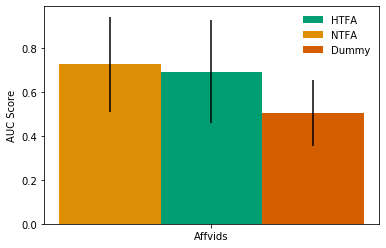

In [32]:
htfa_accuracies = np.mean(htfa_summary_result)
htfa_errs = np.std(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_result)
ntfa_errs = np.std(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_result)
dummy_errs = np.std(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_accuracies.pdf')

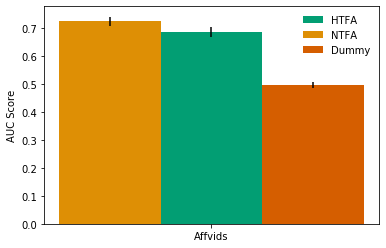

In [33]:
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_result)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_se_accuracies.pdf')

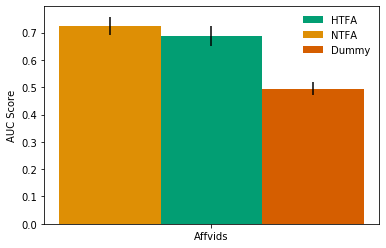

In [34]:
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_result) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Affvids'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
ntfa_bar = pl.bar(xs, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1*bar_width, datasets)
pl.legend((htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_connectivity_ci_accuracies.pdf')